### Libraries and dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Data Preparation

In [3]:
df = pd.read_csv('Stock_Markets.csv')
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,Stock
0,2/21/2023,204.990005,209.710007,197.220001,197.369995,197.369995,180018600,TSLA
1,2/22/2023,197.929993,201.990005,191.779999,200.860001,200.860001,191828500,TSLA
2,2/23/2023,203.910004,205.139999,196.330002,202.070007,202.070007,146360000,TSLA
3,2/24/2023,196.330002,197.669998,192.800003,196.880005,196.880005,142228100,TSLA
4,2/27/2023,202.029999,209.419998,201.259995,207.630005,207.630005,161028300,TSLA


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj_Close,Volume,Stock
2474,8/11/2023,221.500000,222.250000,217.710007,218.199997,218.199997,171800,NICE
2475,8/14/2023,214.300003,219.169998,213.869995,217.639999,217.639999,209600,NICE
2476,8/15/2023,217.339996,219.309998,214.470001,214.759995,214.759995,302300,NICE
2477,8/16/2023,213.729996,215.440002,209.589996,211.490005,211.490005,380000,NICE
2478,8/17/2023,202.250000,202.289993,188.289993,195.320007,195.320007,1625700,NICE


In [5]:
print("Dataset Includes", df.shape[0], "Rows and", df.shape[1], "Features")

Dataset Includes 2479 Rows and 8 Features


Adding Columns To Dataset

In [6]:
headers = ['Date', 'Open', 'High', 'Low', 'Close',	'Adj_Close', 'Volume', 'Stock'] 
df.columns = headers
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,Stock
0,2/21/2023,204.990005,209.710007,197.220001,197.369995,197.369995,180018600,TSLA
1,2/22/2023,197.929993,201.990005,191.779999,200.860001,200.860001,191828500,TSLA
2,2/23/2023,203.910004,205.139999,196.330002,202.070007,202.070007,146360000,TSLA
3,2/24/2023,196.330002,197.669998,192.800003,196.880005,196.880005,142228100,TSLA
4,2/27/2023,202.029999,209.419998,201.259995,207.630005,207.630005,161028300,TSLA


### Checking For Missing Values In Each Feature

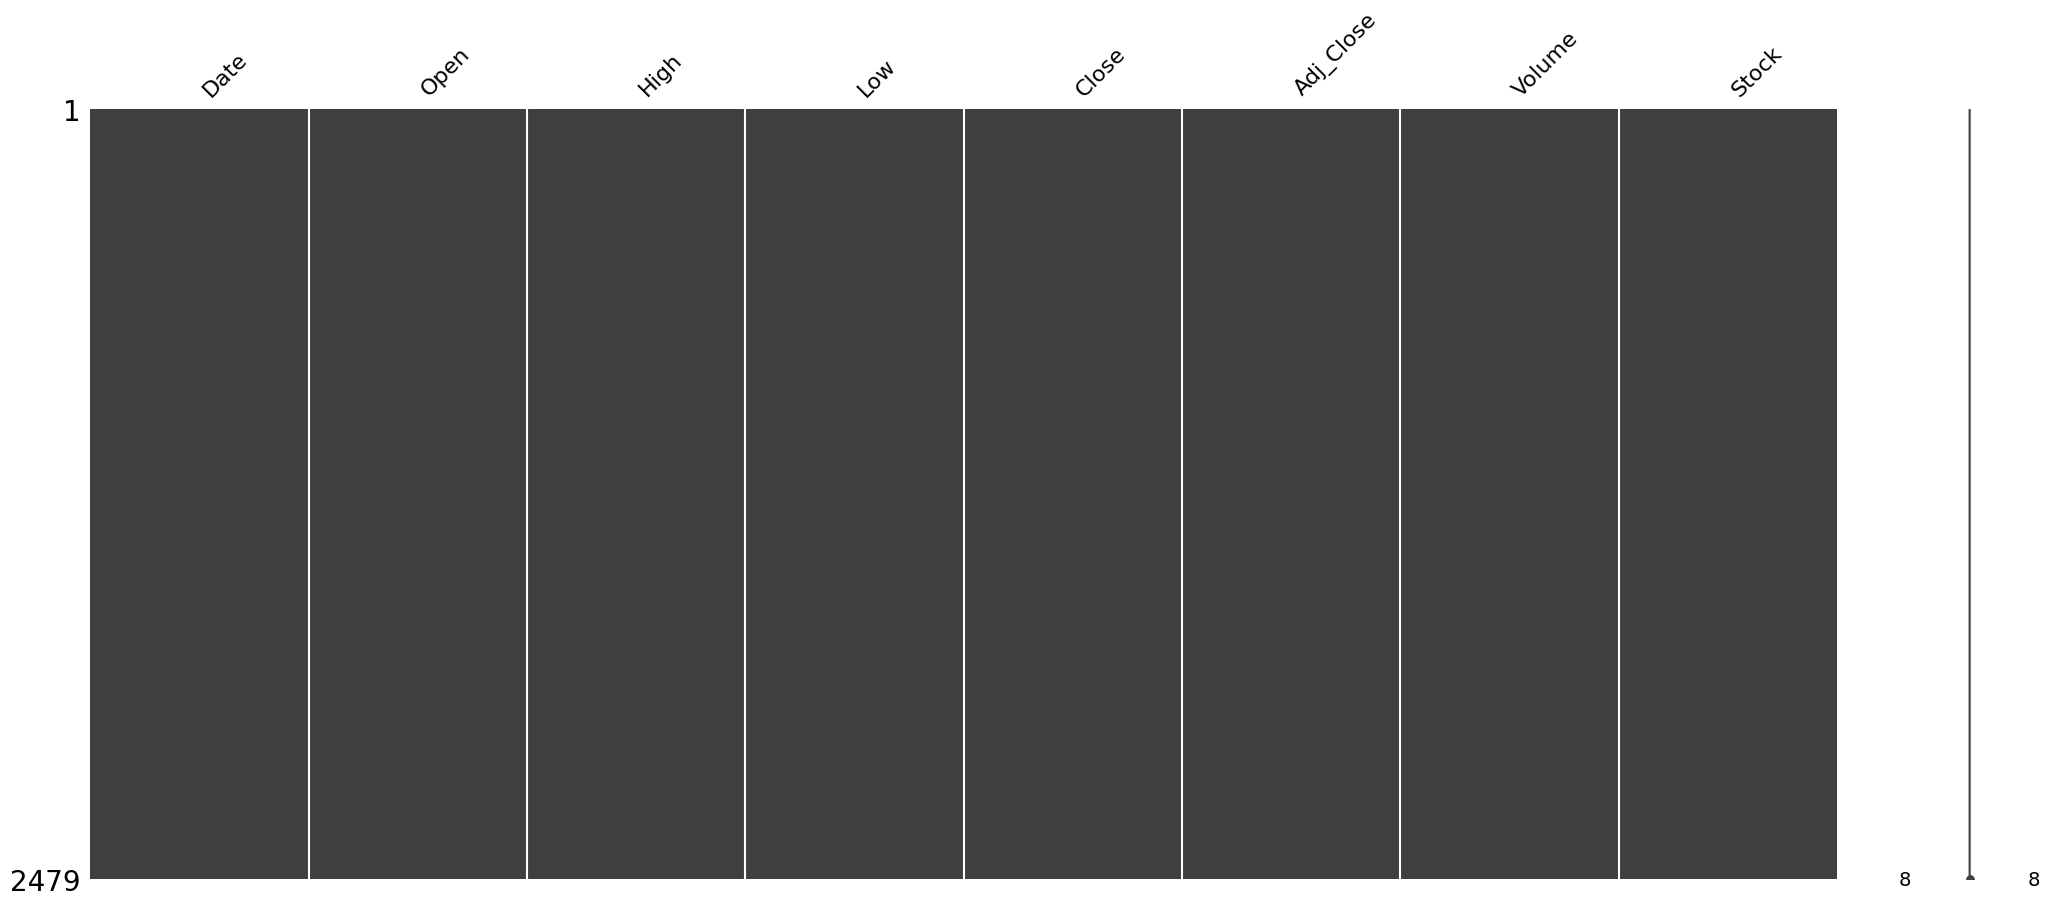

In [7]:
msno.matrix(df)
plt.show()

Figure Shows Only a Little Proportion of Dataset includes Missing Values. Therefore, We'd Drop All Incomplete Entries.

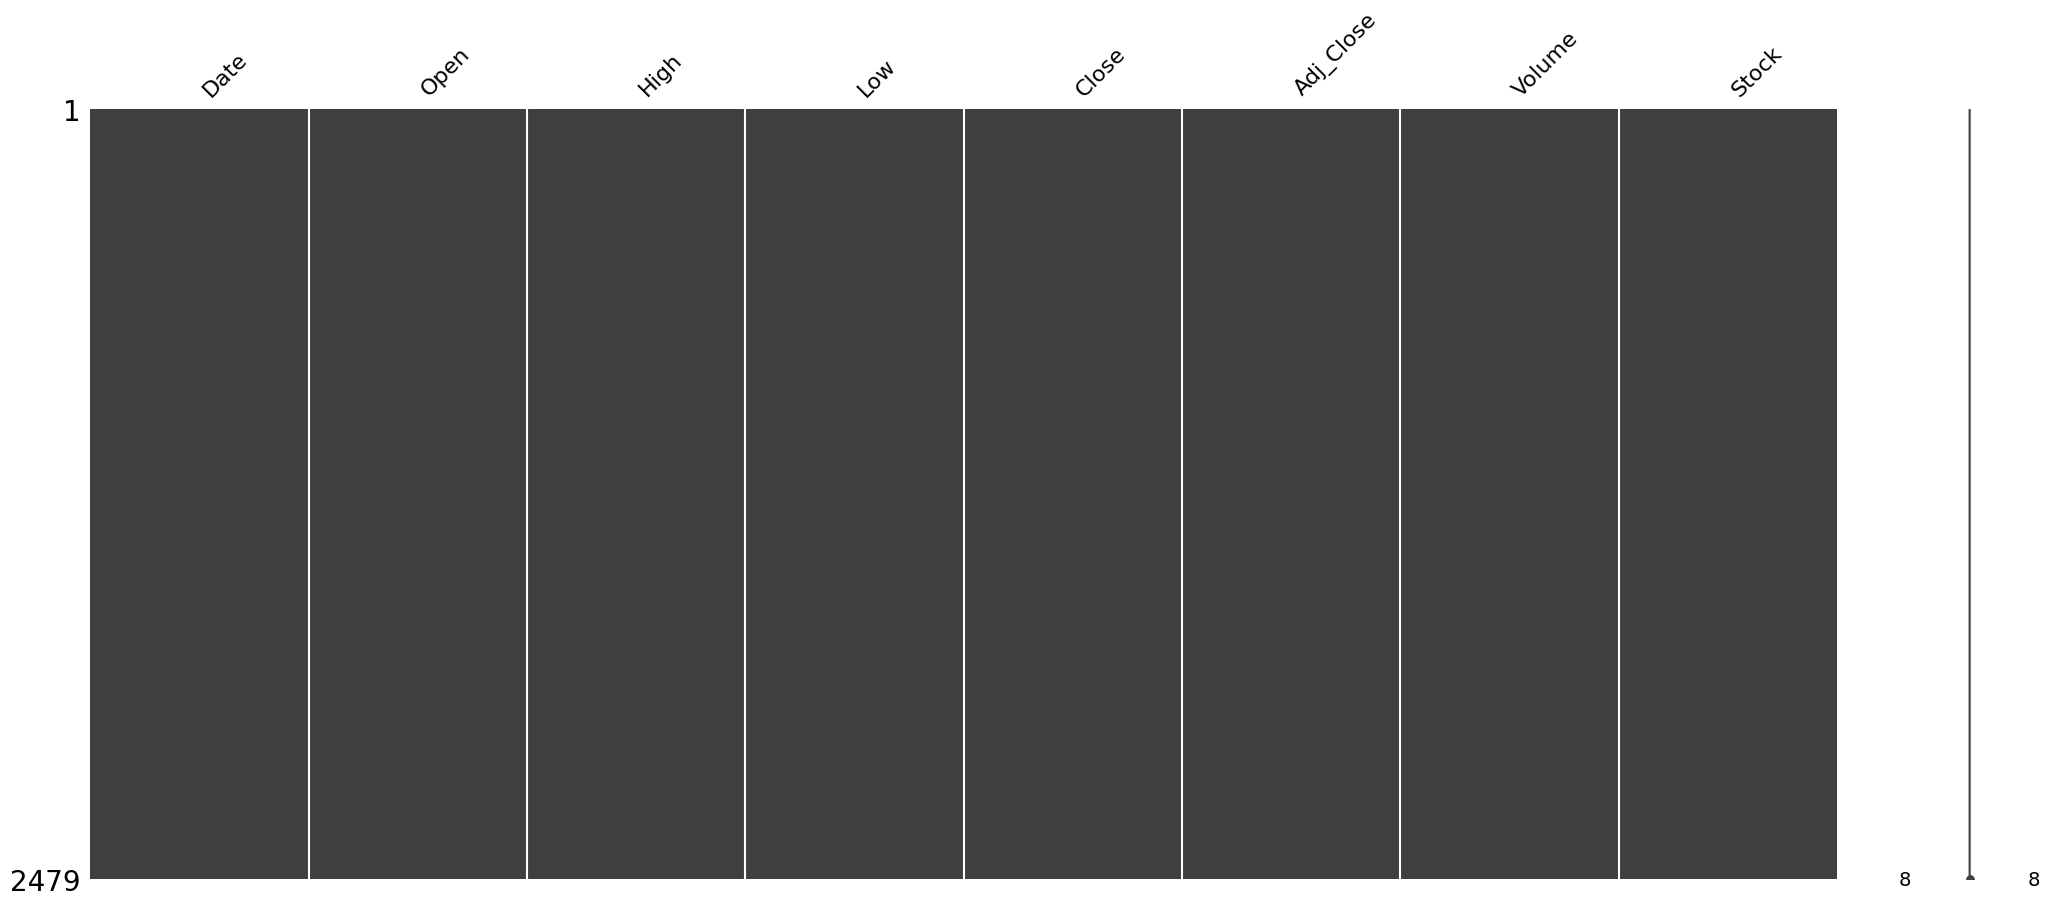

In [8]:
df = df.dropna()

msno.matrix(df)
plt.show()

Saving Changes To Dataset

In [9]:
df.to_csv('Stock_Markets.csv', index=False)

In [10]:
# Convert the `Date` feature to a datetime object.
df['Date'] = pd.to_datetime(df['Date'])

# Set the `Date` feature as the index of the DataFrame.
df = df.set_index('Date')

# Create new features based on the `Date` feature.
df['Day_of_Year'] = df.index.dayofyear
df['Month_of_Year'] = df.index.month


In [11]:
df.head()

,Open,High,Low,Close,Adj_Close,Volume,Stock,Day_of_Year,Month_of_Year
Date,,,,,,,,,
2023-02-21,204.990005,209.710007,197.220001,197.369995,197.369995,180018600,TSLA,52,2
2023-02-22,197.929993,201.990005,191.779999,200.860001,200.860001,191828500,TSLA,53,2
2023-02-23,203.910004,205.139999,196.330002,202.070007,202.070007,146360000,TSLA,54,2
2023-02-24,196.330002,197.669998,192.800003,196.880005,196.880005,142228100,TSLA,55,2
2023-02-27,202.029999,209.419998,201.259995,207.630005,207.630005,161028300,TSLA,58,2


In [12]:
# Creating a list of all of the unique stock names in the dataset.
unique_stocks = df['Stock'].unique()

# Assigning a unique ID to each stock name in the list.
stock_id_maps = {}
for i in range(len(unique_stocks)):
  stock_id_maps[unique_stocks[i]] = i

# Mapping the stock names in the dataset to their corresponding IDs.
df['Stock_ID'] = df['Stock'].apply(lambda x: stock_id_maps[x])

int_df = df.drop("Stock", axis=1)
df.head()

,Open,High,Low,Close,Adj_Close,Volume,Stock,Day_of_Year,Month_of_Year,Stock_ID
Date,,,,,,,,,,
2023-02-21,204.990005,209.710007,197.220001,197.369995,197.369995,180018600,TSLA,52,2,0
2023-02-22,197.929993,201.990005,191.779999,200.860001,200.860001,191828500,TSLA,53,2,0
2023-02-23,203.910004,205.139999,196.330002,202.070007,202.070007,146360000,TSLA,54,2,0
2023-02-24,196.330002,197.669998,192.800003,196.880005,196.880005,142228100,TSLA,55,2,0
2023-02-27,202.029999,209.419998,201.259995,207.630005,207.630005,161028300,TSLA,58,2,0


# EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2479 entries, 2023-02-21 to 2023-08-17
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           2479 non-null   float64
 1   High           2479 non-null   float64
 2   Low            2479 non-null   float64
 3   Close          2479 non-null   float64
 4   Adj_Close      2479 non-null   float64
 5   Volume         2479 non-null   int64  
 6   Stock          2479 non-null   object 
 7   Day_of_Year    2479 non-null   int32  
 8   Month_of_Year  2479 non-null   int32  
 9   Stock_ID       2479 non-null   int64  
dtypes: float64(5), int32(2), int64(2), object(1)
memory usage: 193.7+ KB


In [14]:
df.describe()

,Open,High,Low,Close,Adj_Close,Volume,Day_of_Year,Month_of_Year,Stock_ID
count,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2.479000e+03,2479.000000,2479.000000,2479.000000
mean,110.193951,111.747581,108.645550,110.211051,110.128429,3.159484e+07,139.565551,5.116579,9.503832
std,111.323028,112.912443,109.762222,111.356458,111.353763,3.814231e+07,52.193744,1.753275,5.765449
min,0.400000,0.400000,0.390000,0.400000,0.400000,4.650000e+04,48.000000,2.000000,0.000000
25%,17.545000,18.134999,16.955000,17.525001,17.525001,1.792650e+06,94.000000,4.000000,5.000000
50%,76.309998,77.720001,73.779999,74.800003,74.800003,1.790120e+07,138.000000,5.000000,10.000000
75%,179.165001,180.794998,177.389999,179.435005,179.375000,4.818965e+07,186.000000,7.000000,14.500000
max,476.859985,485.000000,470.000000,477.589996,477.589996,2.272441e+08,229.000000,8.000000,19.000000


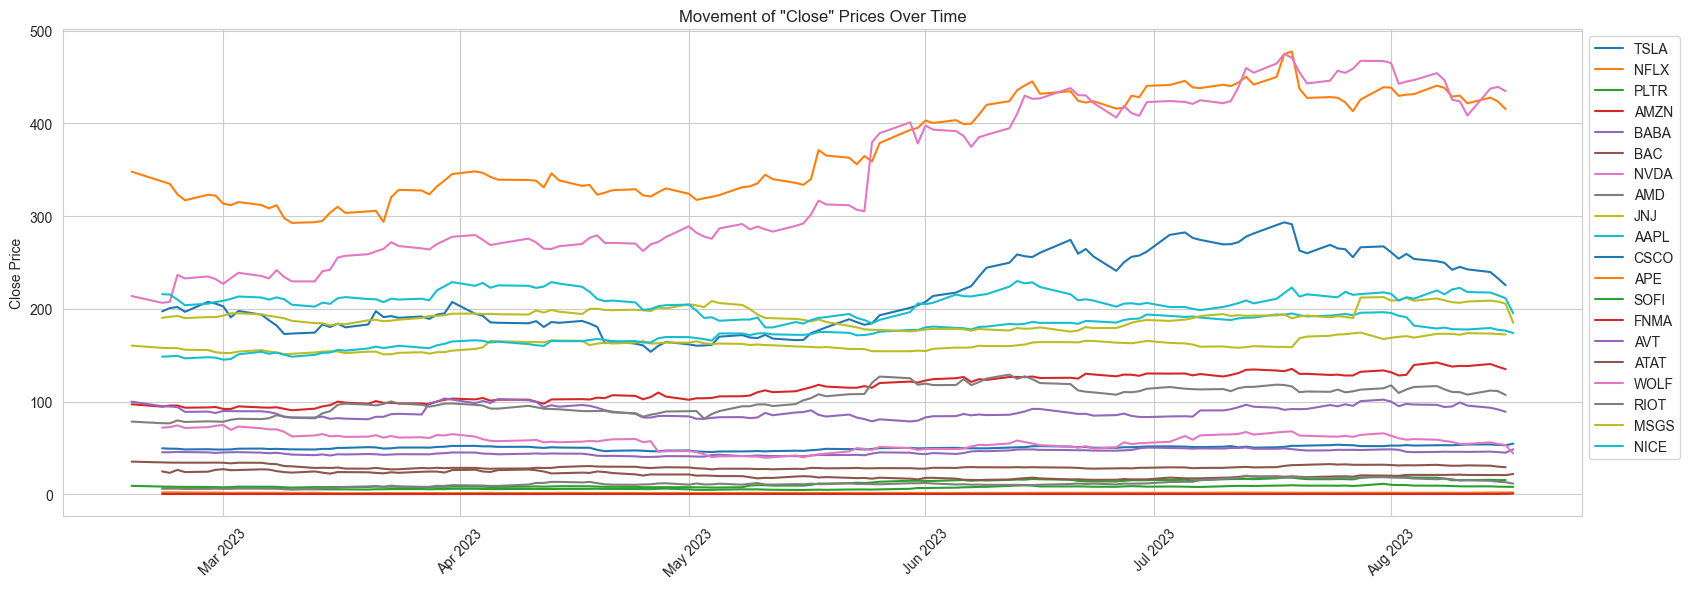

In [15]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
import seaborn as sns

# Assuming 'df' is your DataFrame containing stock data

# Set the style for the plot
sns.set_style("whitegrid")

# Create a figure and axis
plt.figure(figsize=(17, 6))
ax = plt.gca()

# Iterate through unique stocks and plot their "Close" prices
unique_stocks = df['Stock'].unique()
for stock in unique_stocks:
    stock_data = df[df['Stock'] == stock]
    ax.plot(stock_data.index, stock_data['Close'], label=stock)

# Customize the plot
plt.title('Movement of "Close" Prices Over Time')
plt.ylabel('Close Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Format x-axis to display only months
months = MonthLocator(interval=1)  # Show ticks for each month
date_format = DateFormatter('%b %Y')  # Format like "Jan 2023"
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


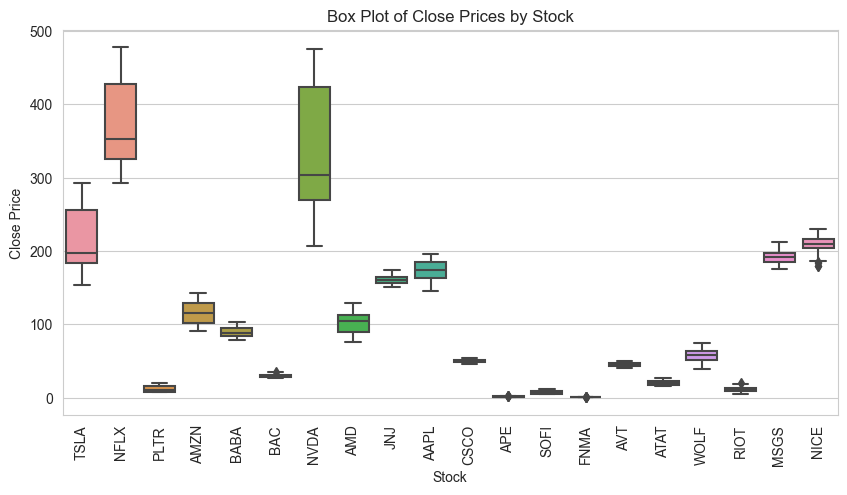

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Stock', y='Close', data=df)
plt.xlabel('Stock')
plt.ylabel('Close Price')
plt.title('Box Plot of Close Prices by Stock')
plt.xticks(rotation=90)
plt.show()

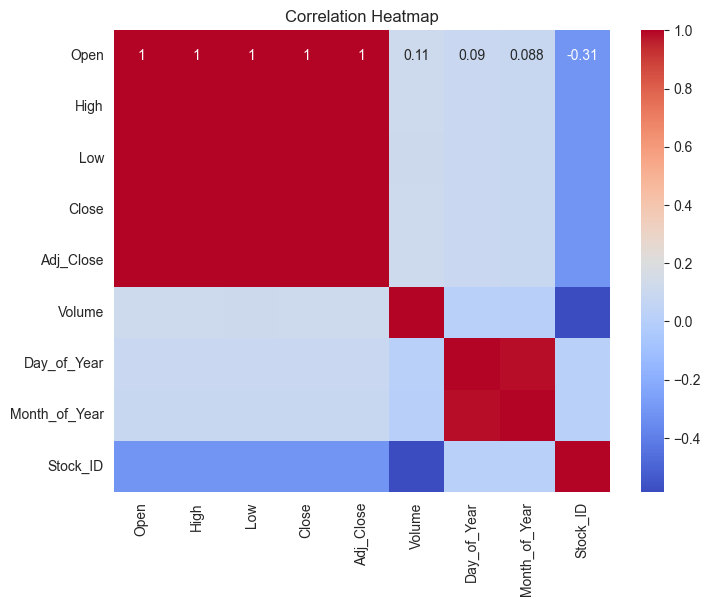

In [17]:
plt.figure(figsize=(8, 6))
corr_matrix = int_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

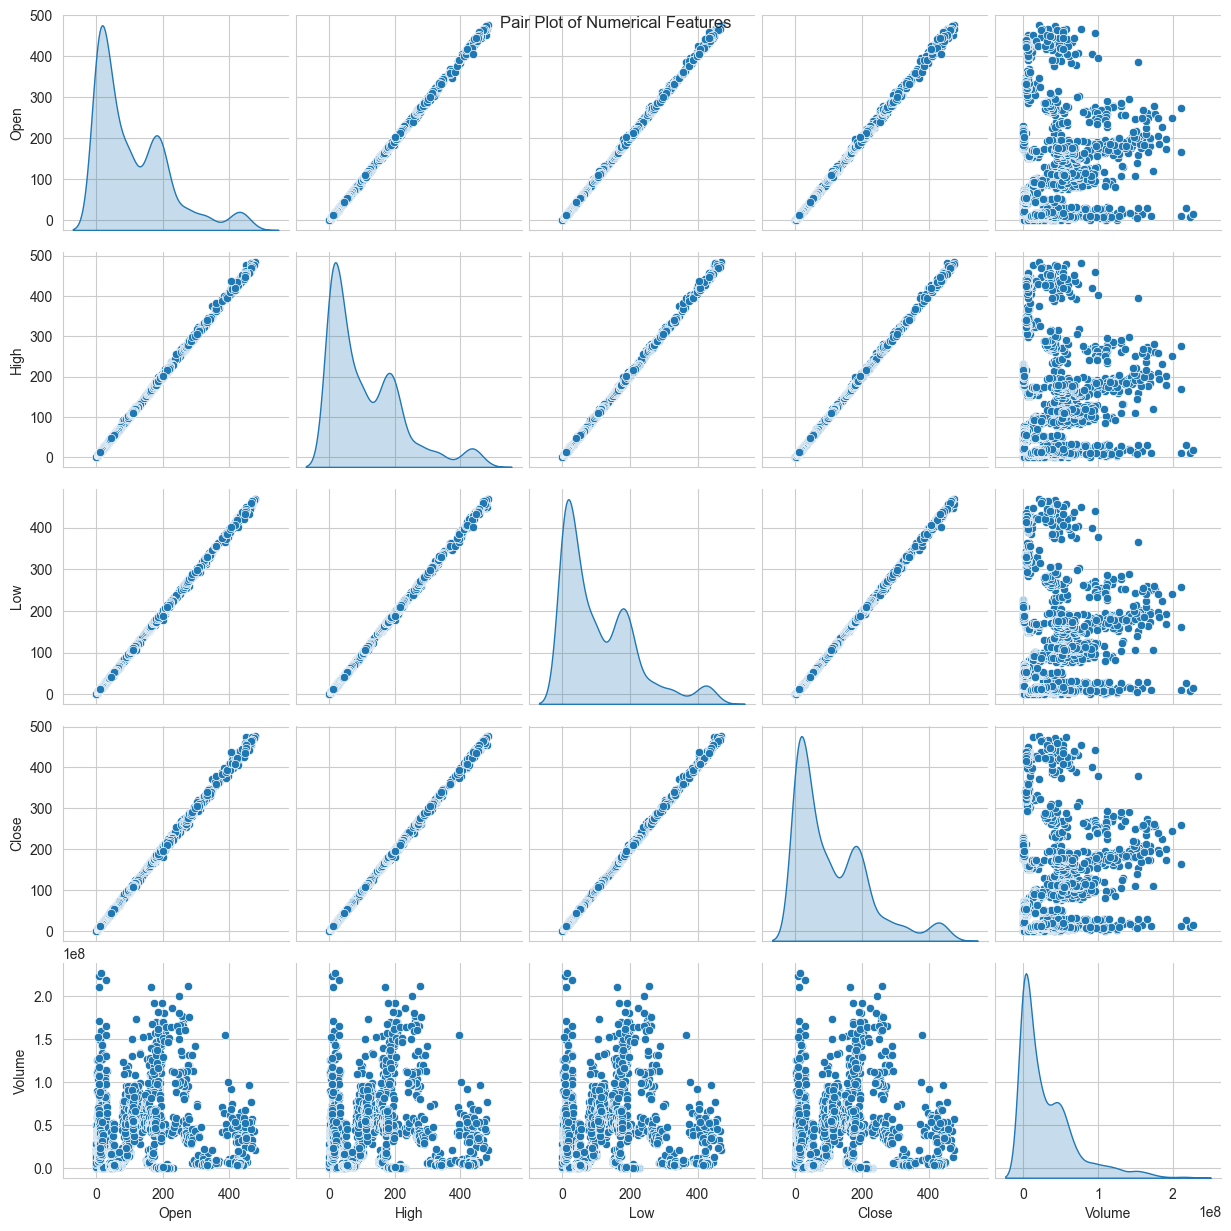

In [18]:
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume']], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features')
plt.show()

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


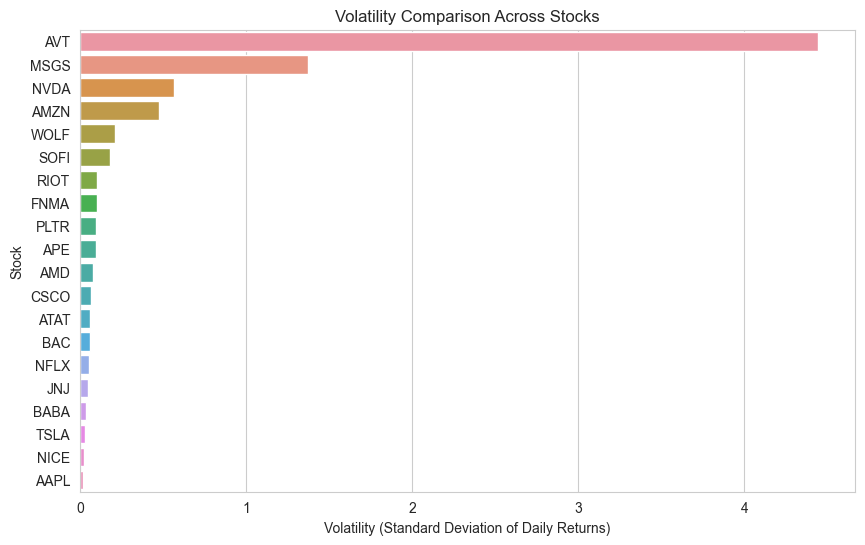

In [19]:
# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Calculate daily volatility
volatility_df = df.groupby('Stock')['Daily_Return'].std().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Daily_Return', y='Stock', data=volatility_df.sort_values(by='Daily_Return', ascending=False))
plt.xlabel('Volatility (Standard Deviation of Daily Returns)')
plt.ylabel('Stock')
plt.title('Volatility Comparison Across Stocks')
plt.show()

In [20]:
# Calculate the percent change in 'Close' and 'Volume' over the past month (20 trading days)
df['Close_Percent_Change'] = df.groupby('Stock')['Close'].pct_change(periods=20)
df['Volume_Percent_Change'] = df.groupby('Stock')['Volume'].pct_change(periods=20)

# Group by 'Stock' and calculate the mean percent change for both 'Close' and 'Volume'
stock_performance = df.groupby('Stock')[['Close_Percent_Change', 'Volume_Percent_Change']].mean()

# Sort the stocks based on their mean percent changes in 'Close' and 'Volume' (in descending order)
top_stocks_performance = stock_performance.sort_values(by=['Close_Percent_Change', 'Volume_Percent_Change'], ascending=False)

# Select the top-performing stocks
top_stocks = top_stocks_performance.head(10)  # You can adjust the number of top stocks as needed

least_stocks_performance = stock_performance.sort_values(by=['Close_Percent_Change', 'Volume_Percent_Change'], ascending=True)

least_stocks = least_stocks_performance.head(10)

# Display the top-performing stocks
print(top_stocks)
print(least_stocks)


       Close_Percent_Change  Volume_Percent_Change
Stock                                             
RIOT               0.243251               0.272552
PLTR               0.181904               0.675748
NVDA               0.140774               0.058747
SOFI               0.114563               0.331927
TSLA               0.074772              -0.022507
AMD                0.070429               0.137277
AMZN               0.070319               0.068194
NFLX               0.066888               0.198967
AAPL               0.042152               0.027014
FNMA               0.021780               0.756353
       Close_Percent_Change  Volume_Percent_Change
Stock                                             
ATAT              -0.026606               1.033072
WOLF              -0.009813               0.259831
BAC               -0.000656               0.066399
NICE               0.009608               0.607655
AVT                0.013374               0.157716
MSGS               0.016138    

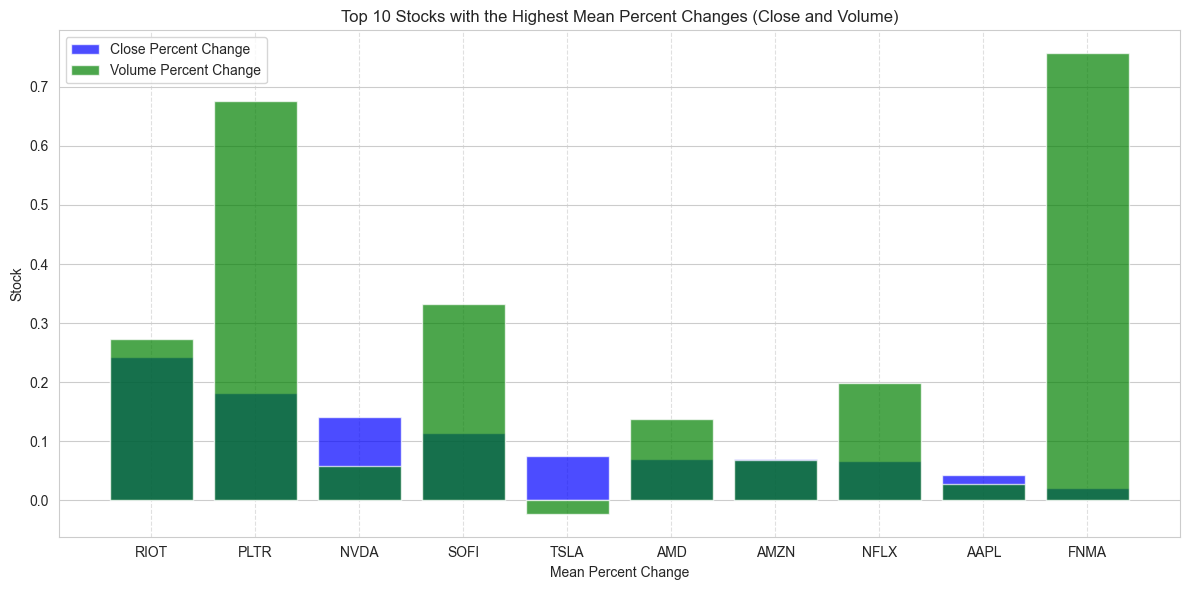

In [21]:
# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_stocks.index, top_stocks['Close_Percent_Change'], label='Close Percent Change', color='b', alpha=0.7)
plt.bar(top_stocks.index, top_stocks['Volume_Percent_Change'], label='Volume Percent Change', color='g', alpha=0.7)
plt.xlabel('Mean Percent Change')
plt.ylabel('Stock')
plt.title(f'Top {10} Stocks with the Highest Mean Percent Changes (Close and Volume)')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


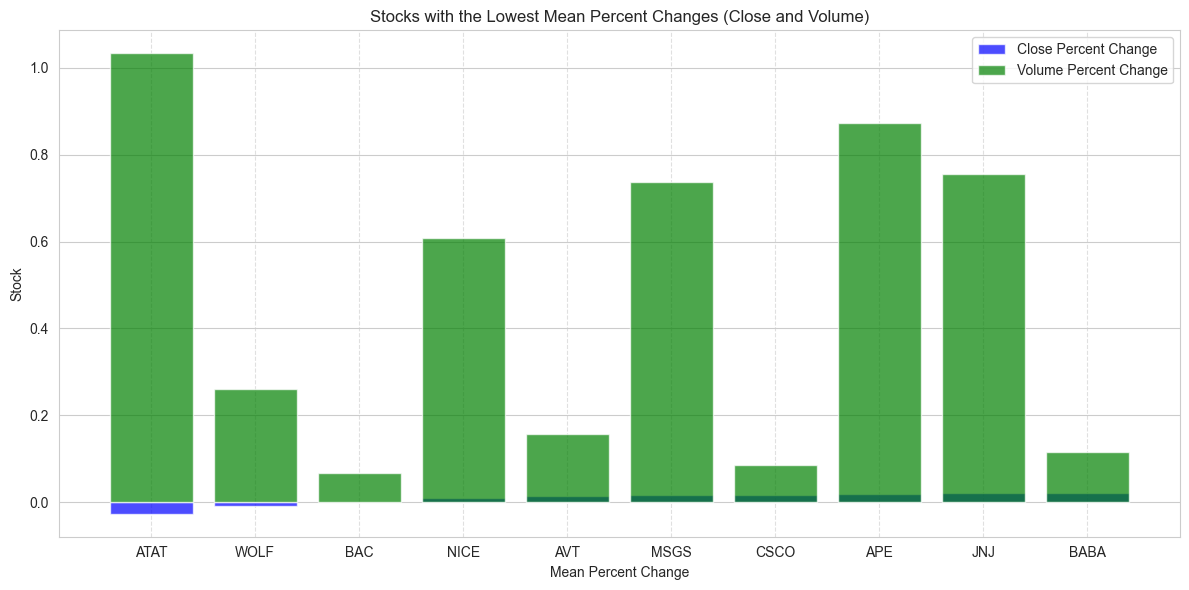

In [22]:
# Creating a bar plot
plt.figure(figsize=(12, 6))
plt.bar(least_stocks.index, least_stocks['Close_Percent_Change'], label='Close Percent Change', color='b', alpha=0.7)
plt.bar(least_stocks.index, least_stocks['Volume_Percent_Change'], label='Volume Percent Change', color='g', alpha=0.7)
plt.xlabel('Mean Percent Change')
plt.ylabel('Stock')
plt.title(f'Stocks with the Lowest Mean Percent Changes (Close and Volume)')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [23]:
X = df [ ['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume', 'Day_of_Year', "Month_of_Year"]]

y = df['Stock_ID']

In [24]:
df = df.drop(["Daily_Return", "Close_Percent_Change", "Volume_Percent_Change"], axis=1)

df.head()

,Open,High,Low,Close,Adj_Close,Volume,Stock,Day_of_Year,Month_of_Year,Stock_ID
Date,,,,,,,,,,
2023-02-21,204.990005,209.710007,197.220001,197.369995,197.369995,180018600,TSLA,52,2,0
2023-02-22,197.929993,201.990005,191.779999,200.860001,200.860001,191828500,TSLA,53,2,0
2023-02-23,203.910004,205.139999,196.330002,202.070007,202.070007,146360000,TSLA,54,2,0
2023-02-24,196.330002,197.669998,192.800003,196.880005,196.880005,142228100,TSLA,55,2,0
2023-02-27,202.029999,209.419998,201.259995,207.630005,207.630005,161028300,TSLA,58,2,0


In [25]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler
# from tensorflow.keras.utils import np_utils # import the np_utils module from keras
from keras.utils import to_categorical

# Create a MinMaxScaler object for features
minmax_scaler = MinMaxScaler()
OH_encoder = OneHotEncoder()
S_scaler = StandardScaler()
L_encoder = LabelEncoder()

In [26]:
X = df.drop('Stock', axis=1) # drop the label column from the DataFrame
X = pd.DataFrame(S_scaler.fit_transform(X))

y = df['Stock'] # select the label column

L_encoder.fit(y)
y = L_encoder.transform(y)
y = to_categorical(y)


print(y)
X.head()

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


,0,1,2,3,4,5,6,7,8
0,0.851712,0.867771,0.807129,0.782860,0.783621,3.892100,-1.678041,-1.777934,-1.648744
1,0.788280,0.799386,0.757558,0.814207,0.814969,4.201790,-1.658877,-1.777934,-1.648744
2,0.842009,0.827289,0.799019,0.825076,0.825838,3.009474,-1.639714,-1.777934,-1.648744
3,0.773905,0.761119,0.766852,0.778459,0.779220,2.901124,-1.620551,-1.777934,-1.648744
4,0.825117,0.865202,0.843944,0.875015,0.875779,3.394120,-1.563061,-1.777934,-1.648744


In [27]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X.values, y, stratify=y, test_size=0.30)

In [28]:
print(X_train)

[[-0.1083009  -0.09653304 -0.09700695 ... -1.14146953 -1.20745798
  -1.12829799]
 [ 0.61074301  0.59779981  0.61531254 ...  0.35326396  0.50397045
   1.4739324 ]
 [-0.8261768  -0.82600635 -0.82727795 ...  0.25744771  0.50397045
   0.95348633]
 ...
 [ 0.73158693  0.71160119  0.73286311 ... -1.37142853 -1.20745798
   1.4739324 ]
 [-0.9229418  -0.92326946 -0.92368758 ... -0.29828654 -0.06650569
  -1.30178001]
 [-0.98646348 -0.98625131 -0.9864723  ... -1.10314303 -1.20745798
   0.60652227]]


In [29]:
print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.layers import Dropout

In [31]:
# First define baseline model. Then use it in Keras Classifier for the training
def baseline_model():
    # Create model here
    model = Sequential()
    model.add(Dense(60, input_shape = (9,), activation = "relu"))
    model.add(Dense(15, activation = "relu"))
    model.add(Dropout(0.2))
    model.add(Dense(20, activation = "softmax"))
    model.compile(Adam(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
    return model

model.summary()

NameError: name 'model' is not defined

In [ ]:
from sklearn.model_selection import KFold
# from sklearn.ensemble import RandomForestClassifier
# Create Keras Classifier and use predefined baseline model
estimator = KerasClassifier(build_fn = baseline_model, epochs = 100, batch_size = 10, verbose = 0)

In [ ]:
# KFold Cross Validation
kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
# Try different values of splits e.g., 10

In [ ]:
# Object to describe the result
results = cross_val_score(estimator, X, y, cv = kfold)
# Result
print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` w

Result: 99.27% (0.47%)


In [ ]:
model.fit(X_train, y_train, verbose=1, epochs=100)

Epoch 1/100
55/55 [==============================] - 5s 6ms/step - loss: 2.8915 - accuracy: 0.1199
Epoch 2/100
55/55 [==============================] - 0s 6ms/step - loss: 2.5927 - accuracy: 0.2167
Epoch 3/100
55/55 [==============================] - 0s 6ms/step - loss: 2.3068 - accuracy: 0.2726
Epoch 4/100
55/55 [==============================] - 0s 5ms/step - loss: 2.0347 - accuracy: 0.3233
Epoch 5/100
55/55 [==============================] - 0s 6ms/step - loss: 1.8096 - accuracy: 0.3787
Epoch 6/100
55/55 [==============================] - 0s 6ms/step - loss: 1.5977 - accuracy: 0.4282
Epoch 7/100
55/55 [==============================] - 0s 6ms/step - loss: 1.4306 - accuracy: 0.4968
Epoch 8/100
55/55 [==============================] - 0s 6ms/step - loss: 1.2700 - accuracy: 0.5602
Epoch 9/100
55/55 [==============================] - 0s 6ms/step - loss: 1.1907 - accuracy: 0.5671
Epoch 10/100
55/55 [==============================] - 0s 5ms/step - loss: 1.0900 - accuracy: 0.6167
Epoch 11/

In [ ]:
# Predicting on Test Data
y_pred = model.predict(X_test)

print(y_pred)

24/24 [==============================] - 0s 5ms/step
[[3.1795946e-07 2.6757766e-22 0.0000000e+00 ... 4.1003205e-09
  2.1342114e-21 1.6479314e-08]
 [2.5496615e-07 9.8944128e-01 1.7727866e-03 ... 2.2859103e-08
  4.1766064e-03 5.6919216e-18]
 [9.6512091e-01 6.8115914e-05 1.8417583e-12 ... 2.7442820e-07
  4.9425729e-05 3.5478510e-07]
 ...
 [1.1593577e-20 1.1173679e-13 3.1969758e-13 ... 6.5453947e-02
  1.3861267e-14 1.6398792e-34]
 [2.3771447e-06 3.5914547e-20 5.7362989e-37 ... 5.3723003e-08
  2.2667791e-20 2.0615416e-05]
 [5.3777227e-16 7.0876017e-14 3.3795486e-15 ... 9.9377030e-01
  2.7668460e-13 1.4000817e-25]]


In [ ]:
# Convert predicted probabilities to class labels

y_test_1 = np.argmax(y_test, axis=1) 
y_pred_1 = np.argmax(y_pred, axis=1)


print(y_pred_1)


[13  1  0  6 10  1  2  2 18  6 13 16  7 14  9 19  0  4  7  0  7  4 10 17
 17 11 13 15  7  4 17 11 14  8  0 10 12  6  4 16  8 11  7  3 18  0  2  1
 12  2  1  4  7 14  0  9  5 19  6  8  1  0  8  1  5 19 15 10  1 19  2 14
 16  7 10 10  5 16 10 12 18 16 18 15 19 12 15 16  8  4  7 17 16 17 13  9
  6  9 12  9 11 10  9  6  5 12  3  5 19 16 13 17 10 19 12 14  4 12  5 15
  6  6  4  6 19 12 14  5  2  4 14  2  0 11  1 19  0 17 13  9  8  5  9  7
 17  1  0  6 13 16  7  8 11 15  0 15  8  0  9  5 19 17  6  0  3 18  7  1
 17  2 15  0 14 16  5 18  5  2 14 16  5 14 17  1  7  4  2  2  8  7  6 12
  2  1  3 13 12  0 13  1 10 16  4  7  6 14  7 13  8  1 10 16 16 11 10 19
  8  3 16  2 18 16  1  9 14  8  1  7 12  4 11  0 19 12  6  0  9  1  8  2
 14  0 12 11  5 18  0 12 19  7  5  3 11 11 16  4  7  3 19 10 15  5  9 11
 10 17 12  5  1 18  7 12 11  2  3 11 17 13 15  4 18 18  8 17 15 17 15  7
  7 18 19 19  6  0 15 19  1  7 18 13  2 19 12  4 19  3 14 14 19 13 13  3
  5 10  8 13 18 15  6 15  9  1 10 11 12  4 13  4 15

Training Features Shape: (1735, 9)
Training Labels Shape: (1735, 20)
Testing Features Shape: (744, 9)
Testing Labels Shape: (744, 20)


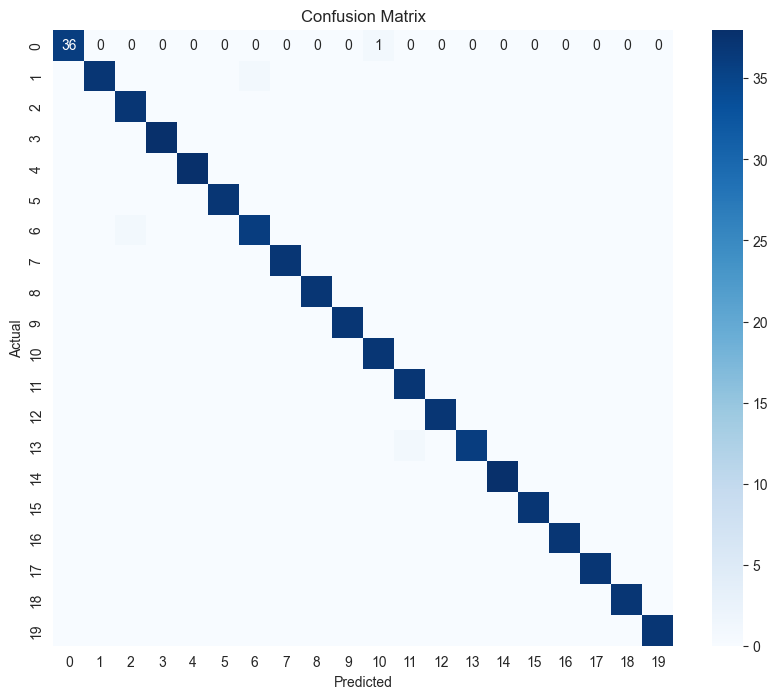

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       1.00      0.97      0.99        38
           2       0.97      1.00      0.99        37
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        37
           6       0.97      0.97      0.97        37
           7       1.00      1.00      1.00        37
           8       1.00      1.00      1.00        37
           9       1.00      1.00      1.00        37
          10       0.97      1.00      0.99        37
          11       0.97      1.00      0.99        37
          12       1.00      1.00      1.00        37
          13       1.00      0.97      0.99        37
          14       1.00      1.00      1.00        38
          15       1.00      1.00      1.00        37
          16       1.00      1.00      1.00        37
          17       1.00    

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score


print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)



# Compute the confusion matrix
cm = confusion_matrix(y_test_1, y_pred_1)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test_1, y_pred_1))


# Model 2 - Hyperparameter Tuning

In [ ]:
# Getting the number of features as the input shape
input_shape = X.shape[1] 

# Determining the correct number of classes based on unique values in y_train
# num_classes = len(set(y_train))
num_classes = 20

# Converting integer labels to one-hot encoding
# y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
# y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

y_train_one_hot = y_train
y_test_one_hot = y_test

# Designing the sequential model.
def create_model(learning_rate, activation, optimizer = 'adam'):
    opt = Adam(learning_rate = learning_rate)
    model = Sequential()
    model.add(Dense(15, input_shape=(input_shape,), activation=activation))
    # # Add 50 hidden layers
    # for i in range(50):
    #     model.add(Dense(128, activation=activation))
    model.add(Dense(5, activation=activation))
    model.add(Dense(5, activation=activation))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model, learning_rate=0.01, activation = 'relu')

# Define the parameters to try out
params = {'activation': ['relu', 'tanh'], 'batch_size': [32, 128, 256], 
          'epochs': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(model, param_distributions = params, cv = 3)

random_search_results = random_search.fit(X_train, y_train_one_hot)

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100
37/37 [==============================] - 3s 6ms/step - loss: 2.9491 - accuracy: 0.0597
Epoch 2/100
37/37 [==============================] - 0s 7ms/step - loss: 2.8942 - accuracy: 0.0848
Epoch 3/100
37/37 [==============================] - 0s 5ms/step - loss: 2.8365 - accuracy: 0.1073
Epoch 4/100
37/37 [==============================] - 0s 5ms/step - loss: 2.7649 - accuracy: 0.1055
Epoch 5/100
37/37 [==============================] - 0s 6ms/step - loss: 2.6858 - accuracy: 0.1055
Epoch 6/100
37/37 [==============================] - 0s 6ms/step - loss: 2.6102 - accuracy: 0.1055
Epoch 7/100
37/37 [==============================] - 0s 5ms/step - loss: 2.5350 - accuracy: 0.1055
Epoch 8/100
37/37 [==============================] - 0s 5ms/step - loss: 2.4610 - accuracy: 0.1090
Epoch 9/100
37/37 [==============================] - 0s 6ms/step - loss: 2.3851 - accuracy: 0.1246
Epoch 10/100
37/37 [==============================] - 0s 8ms/step - loss: 2.3114 - accuracy: 0.1332
Epoch 11/

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100
37/37 [==============================] - 4s 7ms/step - loss: 2.9934 - accuracy: 0.0303
Epoch 2/100
37/37 [==============================] - 0s 5ms/step - loss: 2.9710 - accuracy: 0.0640
Epoch 3/100
37/37 [==============================] - 0s 6ms/step - loss: 2.9463 - accuracy: 0.0942
Epoch 4/100
37/37 [==============================] - 0s 5ms/step - loss: 2.9090 - accuracy: 0.0882
Epoch 5/100
37/37 [==============================] - 0s 5ms/step - loss: 2.8548 - accuracy: 0.0821
Epoch 6/100
37/37 [==============================] - 0s 5ms/step - loss: 2.8010 - accuracy: 0.0994
Epoch 7/100
37/37 [==============================] - 0s 6ms/step - loss: 2.7535 - accuracy: 0.0925
Epoch 8/100
37/37 [==============================] - 0s 8ms/step - loss: 2.7106 - accuracy: 0.0890
Epoch 9/100
37/37 [==============================] - 0s 7ms/step - loss: 2.6704 - accuracy: 0.0977
Epoch 10/100
37/37 [==============================] - 0s 7ms/step - loss: 2.6337 - accuracy: 0.0916
Epoch 11/

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100
37/37 [==============================] - 3s 4ms/step - loss: 2.9799 - accuracy: 0.0683
Epoch 2/100
37/37 [==============================] - 0s 5ms/step - loss: 2.9226 - accuracy: 0.0951
Epoch 3/100
37/37 [==============================] - 0s 4ms/step - loss: 2.8469 - accuracy: 0.0925
Epoch 4/100
37/37 [==============================] - 0s 4ms/step - loss: 2.7471 - accuracy: 0.0994
Epoch 5/100
37/37 [==============================] - 0s 5ms/step - loss: 2.6201 - accuracy: 0.1003
Epoch 6/100
37/37 [==============================] - 0s 5ms/step - loss: 2.5039 - accuracy: 0.0968
Epoch 7/100
37/37 [==============================] - 0s 4ms/step - loss: 2.4188 - accuracy: 0.0856
Epoch 8/100
37/37 [==============================] - 0s 6ms/step - loss: 2.3518 - accuracy: 0.1020
Epoch 9/100
37/37 [==============================] - 0s 6ms/step - loss: 2.2975 - accuracy: 0.1115
Epoch 10/100
37/37 [==============================] - 0s 6ms/step - loss: 2.2448 - accuracy: 0.1392
Epoch 11/

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
5/5 [==============================] - 4s 10ms/step - loss: 3.0410 - accuracy: 0.0753
Epoch 2/50
5/5 [==============================] - 0s 10ms/step - loss: 3.0267 - accuracy: 0.0718
Epoch 3/50
5/5 [==============================] - 0s 10ms/step - loss: 3.0148 - accuracy: 0.0649
Epoch 4/50
5/5 [==============================] - 0s 14ms/step - loss: 3.0051 - accuracy: 0.0770
Epoch 5/50
5/5 [==============================] - 0s 12ms/step - loss: 2.9964 - accuracy: 0.0934
Epoch 6/50
5/5 [==============================] - 0s 11ms/step - loss: 2.9891 - accuracy: 0.1021
Epoch 7/50
5/5 [==============================] - 0s 10ms/step - loss: 2.9820 - accuracy: 0.1107
Epoch 8/50
5/5 [==============================] - 0s 9ms/step - loss: 2.9753 - accuracy: 0.1133
Epoch 9/50
5/5 [==============================] - 0s 8ms/step - loss: 2.9684 - accuracy: 0.1125
Epoch 10/50
5/5 [==============================] - 0s 8ms/step - loss: 2.9617 - accuracy: 0.1125
Epoch 11/50
5/5 [===============

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
5/5 [==============================] - 5s 8ms/step - loss: 3.0019 - accuracy: 0.0475
Epoch 2/50
5/5 [==============================] - 0s 7ms/step - loss: 2.9934 - accuracy: 0.0458
Epoch 3/50
5/5 [==============================] - 0s 11ms/step - loss: 2.9858 - accuracy: 0.0467
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: 2.9787 - accuracy: 0.0657
Epoch 5/50
5/5 [==============================] - 0s 5ms/step - loss: 2.9719 - accuracy: 0.0847
Epoch 6/50
5/5 [==============================] - 0s 14ms/step - loss: 2.9652 - accuracy: 0.0985
Epoch 7/50
5/5 [==============================] - 0s 16ms/step - loss: 2.9581 - accuracy: 0.1080
Epoch 8/50
5/5 [==============================] - 0s 8ms/step - loss: 2.9501 - accuracy: 0.1236
Epoch 9/50
5/5 [==============================] - 0s 7ms/step - loss: 2.9418 - accuracy: 0.1296
Epoch 10/50
5/5 [==============================] - 0s 16ms/step - loss: 2.9329 - accuracy: 0.1383
Epoch 11/50
5/5 [==================

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
5/5 [==============================] - 5s 11ms/step - loss: 3.0120 - accuracy: 0.0458
Epoch 2/50
5/5 [==============================] - 0s 10ms/step - loss: 3.0060 - accuracy: 0.0596
Epoch 3/50
5/5 [==============================] - 0s 10ms/step - loss: 3.0007 - accuracy: 0.0700
Epoch 4/50
5/5 [==============================] - 0s 9ms/step - loss: 2.9959 - accuracy: 0.0726
Epoch 5/50
5/5 [==============================] - 0s 10ms/step - loss: 2.9916 - accuracy: 0.0709
Epoch 6/50
5/5 [==============================] - 0s 12ms/step - loss: 2.9870 - accuracy: 0.0614
Epoch 7/50
5/5 [==============================] - 0s 9ms/step - loss: 2.9819 - accuracy: 0.0640
Epoch 8/50
5/5 [==============================] - 0s 9ms/step - loss: 2.9763 - accuracy: 0.0847
Epoch 9/50
5/5 [==============================] - 0s 9ms/step - loss: 2.9704 - accuracy: 0.0977
Epoch 10/50
5/5 [==============================] - 0s 8ms/step - loss: 2.9640 - accuracy: 0.0977
Epoch 11/50
5/5 [=================

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
10/10 [==============================] - 3s 7ms/step - loss: 3.0011 - accuracy: 0.0493
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 2.9843 - accuracy: 0.0493
Epoch 3/200
10/10 [==============================] - 0s 7ms/step - loss: 2.9718 - accuracy: 0.0510
Epoch 4/200
10/10 [==============================] - 0s 6ms/step - loss: 2.9595 - accuracy: 0.0554
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 2.9462 - accuracy: 0.0536
Epoch 6/200
10/10 [==============================] - 0s 7ms/step - loss: 2.9307 - accuracy: 0.0640
Epoch 7/200
10/10 [==============================] - 0s 6ms/step - loss: 2.9147 - accuracy: 0.0804
Epoch 8/200
10/10 [==============================] - 0s 5ms/step - loss: 2.8984 - accuracy: 0.0856
Epoch 9/200
10/10 [==============================] - 0s 5ms/step - loss: 2.8794 - accuracy: 0.0891
Epoch 10/200
10/10 [==============================] - 0s 5ms/step - loss: 2.8588 - accuracy: 0.0943
Epoch 11/

5/5 [==============================] - 0s 5ms/step


c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
10/10 [==============================] - 3s 5ms/step - loss: 3.0463 - accuracy: 0.0285
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 3.0173 - accuracy: 0.0277
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 2.9918 - accuracy: 0.0363
Epoch 4/200
10/10 [==============================] - 0s 7ms/step - loss: 2.9708 - accuracy: 0.0631
Epoch 5/200
10/10 [==============================] - 0s 7ms/step - loss: 2.9536 - accuracy: 0.0657
Epoch 6/200
10/10 [==============================] - 0s 7ms/step - loss: 2.9389 - accuracy: 0.0700
Epoch 7/200
10/10 [==============================] - 0s 8ms/step - loss: 2.9262 - accuracy: 0.0752
Epoch 8/200
10/10 [==============================] - 0s 6ms/step - loss: 2.9124 - accuracy: 0.0864
Epoch 9/200
10/10 [==============================] - 0s 5ms/step - loss: 2.8986 - accuracy: 0.1253
Epoch 10/200
10/10 [==============================] - 0s 5ms/step - loss: 2.8843 - accuracy: 0.1400
Epoch 11/

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
10/10 [==============================] - 4s 10ms/step - loss: 3.0026 - accuracy: 0.0398
Epoch 2/200
10/10 [==============================] - 0s 9ms/step - loss: 2.9887 - accuracy: 0.0346
Epoch 3/200
10/10 [==============================] - 0s 10ms/step - loss: 2.9763 - accuracy: 0.0346
Epoch 4/200
10/10 [==============================] - 0s 10ms/step - loss: 2.9639 - accuracy: 0.0398
Epoch 5/200
10/10 [==============================] - 0s 8ms/step - loss: 2.9505 - accuracy: 0.0475
Epoch 6/200
10/10 [==============================] - 0s 7ms/step - loss: 2.9357 - accuracy: 0.0493
Epoch 7/200
10/10 [==============================] - 0s 5ms/step - loss: 2.9192 - accuracy: 0.0501
Epoch 8/200
10/10 [==============================] - 0s 5ms/step - loss: 2.9016 - accuracy: 0.0475
Epoch 9/200
10/10 [==============================] - 0s 6ms/step - loss: 2.8828 - accuracy: 0.0415
Epoch 10/200
10/10 [==============================] - 0s 5ms/step - loss: 2.8623 - accuracy: 0.0285
Epoch 

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
37/37 [==============================] - 5s 7ms/step - loss: 2.9892 - accuracy: 0.0450
Epoch 2/200
37/37 [==============================] - 0s 7ms/step - loss: 2.9184 - accuracy: 0.0631
Epoch 3/200
37/37 [==============================] - 0s 6ms/step - loss: 2.8102 - accuracy: 0.0952
Epoch 4/200
37/37 [==============================] - 0s 5ms/step - loss: 2.7101 - accuracy: 0.0952
Epoch 5/200
37/37 [==============================] - 0s 5ms/step - loss: 2.6243 - accuracy: 0.0986
Epoch 6/200
37/37 [==============================] - 0s 5ms/step - loss: 2.5459 - accuracy: 0.1055
Epoch 7/200
37/37 [==============================] - 0s 5ms/step - loss: 2.4711 - accuracy: 0.1116
Epoch 8/200
37/37 [==============================] - 0s 5ms/step - loss: 2.4034 - accuracy: 0.1220
Epoch 9/200
37/37 [==============================] - 0s 5ms/step - loss: 2.3450 - accuracy: 0.1505
Epoch 10/200
37/37 [==============================] - 0s 5ms/step - loss: 2.2955 - accuracy: 0.1644
Epoch 11/

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
37/37 [==============================] - 5s 8ms/step - loss: 2.9836 - accuracy: 0.0657
Epoch 2/200
37/37 [==============================] - 0s 8ms/step - loss: 2.9538 - accuracy: 0.0691
Epoch 3/200
37/37 [==============================] - 0s 8ms/step - loss: 2.9076 - accuracy: 0.1089
Epoch 4/200
37/37 [==============================] - 0s 7ms/step - loss: 2.8478 - accuracy: 0.1141
Epoch 5/200
37/37 [==============================] - 0s 6ms/step - loss: 2.7808 - accuracy: 0.0951
Epoch 6/200
37/37 [==============================] - 0s 8ms/step - loss: 2.7183 - accuracy: 0.1296
Epoch 7/200
37/37 [==============================] - 0s 6ms/step - loss: 2.6621 - accuracy: 0.1322
Epoch 8/200
37/37 [==============================] - 0s 7ms/step - loss: 2.6048 - accuracy: 0.1115
Epoch 9/200
37/37 [==============================] - 0s 7ms/step - loss: 2.5365 - accuracy: 0.1054
Epoch 10/200
37/37 [==============================] - 0s 6ms/step - loss: 2.4679 - accuracy: 0.0994
Epoch 11/

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
37/37 [==============================] - 5s 5ms/step - loss: 2.9838 - accuracy: 0.0562
Epoch 2/200
37/37 [==============================] - 0s 6ms/step - loss: 2.9391 - accuracy: 0.0441
Epoch 3/200
37/37 [==============================] - 0s 7ms/step - loss: 2.8738 - accuracy: 0.0553
Epoch 4/200
37/37 [==============================] - 0s 6ms/step - loss: 2.7861 - accuracy: 0.0916
Epoch 5/200
37/37 [==============================] - 0s 7ms/step - loss: 2.6953 - accuracy: 0.0985
Epoch 6/200
37/37 [==============================] - 0s 7ms/step - loss: 2.6024 - accuracy: 0.0985
Epoch 7/200
37/37 [==============================] - 0s 7ms/step - loss: 2.5105 - accuracy: 0.0985
Epoch 8/200
37/37 [==============================] - 0s 6ms/step - loss: 2.4289 - accuracy: 0.0985
Epoch 9/200
37/37 [==============================] - 0s 6ms/step - loss: 2.3625 - accuracy: 0.1253
Epoch 10/200
37/37 [==============================] - 0s 6ms/step - loss: 2.3069 - accuracy: 0.1392
Epoch 11/

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100
5/5 [==============================] - 4s 6ms/step - loss: 3.0392 - accuracy: 0.0666
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 3.0233 - accuracy: 0.0709
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 3.0093 - accuracy: 0.0727
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 2.9957 - accuracy: 0.0761
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 2.9817 - accuracy: 0.0753
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 2.9684 - accuracy: 0.0761
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 2.9563 - accuracy: 0.0770
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 2.9448 - accuracy: 0.0813
Epoch 9/100
5/5 [==============================] - 0s 11ms/step - loss: 2.9340 - accuracy: 0.0779
Epoch 10/100
5/5 [==============================] - 0s 10ms/step - loss: 2.9215 - accuracy: 0.0804
Epoch 11/100
5/5 [=========

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100
5/5 [==============================] - 6s 11ms/step - loss: 3.0240 - accuracy: 0.0277
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 3.0156 - accuracy: 0.0424
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 3.0079 - accuracy: 0.0545
Epoch 4/100
5/5 [==============================] - 0s 12ms/step - loss: 3.0010 - accuracy: 0.0553
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 2.9945 - accuracy: 0.0579
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 2.9884 - accuracy: 0.0536
Epoch 7/100
5/5 [==============================] - 0s 10ms/step - loss: 2.9826 - accuracy: 0.0570
Epoch 8/100
5/5 [==============================] - 0s 9ms/step - loss: 2.9773 - accuracy: 0.0545
Epoch 9/100
5/5 [==============================] - 0s 16ms/step - loss: 2.9718 - accuracy: 0.0579
Epoch 10/100
5/5 [==============================] - 0s 11ms/step - loss: 2.9661 - accuracy: 0.0570
Epoch 11/100
5/5 [===

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100
5/5 [==============================] - 5s 7ms/step - loss: 2.9932 - accuracy: 0.0847
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 2.9781 - accuracy: 0.0838
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 2.9663 - accuracy: 0.0795
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 2.9548 - accuracy: 0.0769
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 2.9448 - accuracy: 0.0726
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 2.9354 - accuracy: 0.0614
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 2.9250 - accuracy: 0.0588
Epoch 8/100
5/5 [==============================] - 0s 10ms/step - loss: 2.9148 - accuracy: 0.0553
Epoch 9/100
5/5 [==============================] - 0s 9ms/step - loss: 2.9035 - accuracy: 0.0510
Epoch 10/100
5/5 [==============================] - 0s 9ms/step - loss: 2.8912 - accuracy: 0.0536
Epoch 11/100
5/5 [=========

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
5/5 [==============================] - 8s 7ms/step - loss: 3.0026 - accuracy: 0.0588
Epoch 2/50
5/5 [==============================] - 0s 12ms/step - loss: 2.9886 - accuracy: 0.0571
Epoch 3/50
5/5 [==============================] - 0s 11ms/step - loss: 2.9787 - accuracy: 0.0631
Epoch 4/50
5/5 [==============================] - 0s 6ms/step - loss: 2.9713 - accuracy: 0.0683
Epoch 5/50
5/5 [==============================] - 0s 7ms/step - loss: 2.9647 - accuracy: 0.0787
Epoch 6/50
5/5 [==============================] - 0s 6ms/step - loss: 2.9587 - accuracy: 0.0830
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 2.9522 - accuracy: 0.0856
Epoch 8/50
5/5 [==============================] - 0s 8ms/step - loss: 2.9453 - accuracy: 0.0848
Epoch 9/50
5/5 [==============================] - 0s 7ms/step - loss: 2.9379 - accuracy: 0.0874
Epoch 10/50
5/5 [==============================] - 0s 8ms/step - loss: 2.9300 - accuracy: 0.0917
Epoch 11/50
5/5 [====================

3/3 [==============================] - 1s 5ms/step


c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
5/5 [==============================] - 6s 9ms/step - loss: 2.9710 - accuracy: 0.0424
Epoch 2/50
5/5 [==============================] - 0s 9ms/step - loss: 2.9561 - accuracy: 0.0432
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 2.9455 - accuracy: 0.0424
Epoch 4/50
5/5 [==============================] - 0s 9ms/step - loss: 2.9354 - accuracy: 0.0415
Epoch 5/50
5/5 [==============================] - 0s 9ms/step - loss: 2.9257 - accuracy: 0.0536
Epoch 6/50
5/5 [==============================] - 0s 9ms/step - loss: 2.9163 - accuracy: 0.0657
Epoch 7/50
5/5 [==============================] - 0s 9ms/step - loss: 2.9066 - accuracy: 0.0752
Epoch 8/50
5/5 [==============================] - 0s 8ms/step - loss: 2.8966 - accuracy: 0.0890
Epoch 9/50
5/5 [==============================] - 0s 9ms/step - loss: 2.8860 - accuracy: 0.0856
Epoch 10/50
5/5 [==============================] - 0s 8ms/step - loss: 2.8747 - accuracy: 0.0830
Epoch 11/50
5/5 [======================

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
5/5 [==============================] - 4s 6ms/step - loss: 3.0264 - accuracy: 0.0328
Epoch 2/50
5/5 [==============================] - 0s 8ms/step - loss: 3.0147 - accuracy: 0.0545
Epoch 3/50
5/5 [==============================] - 0s 9ms/step - loss: 3.0052 - accuracy: 0.0951
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: 2.9983 - accuracy: 0.1089
Epoch 5/50
5/5 [==============================] - 0s 9ms/step - loss: 2.9930 - accuracy: 0.1124
Epoch 6/50
5/5 [==============================] - 0s 9ms/step - loss: 2.9891 - accuracy: 0.1201
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 2.9855 - accuracy: 0.1201
Epoch 8/50
5/5 [==============================] - 0s 6ms/step - loss: 2.9818 - accuracy: 0.1193
Epoch 9/50
5/5 [==============================] - 0s 5ms/step - loss: 2.9779 - accuracy: 0.1201
Epoch 10/50
5/5 [==============================] - 0s 7ms/step - loss: 2.9738 - accuracy: 0.1201
Epoch 11/50
5/5 [======================

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100
5/5 [==============================] - 6s 8ms/step - loss: 3.0227 - accuracy: 0.0536
Epoch 2/100
5/5 [==============================] - 0s 13ms/step - loss: 3.0006 - accuracy: 0.0891
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 2.9817 - accuracy: 0.1029
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 2.9632 - accuracy: 0.1003
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: 2.9469 - accuracy: 0.0891
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 2.9313 - accuracy: 0.0761
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 2.9160 - accuracy: 0.0744
Epoch 8/100
5/5 [==============================] - 0s 13ms/step - loss: 2.9010 - accuracy: 0.0744
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 2.8861 - accuracy: 0.0796
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 2.8708 - accuracy: 0.0839
Epoch 11/100
5/5 [========

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100
5/5 [==============================] - 3s 10ms/step - loss: 3.0281 - accuracy: 0.0398
Epoch 2/100
5/5 [==============================] - 0s 14ms/step - loss: 3.0143 - accuracy: 0.0484
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 3.0019 - accuracy: 0.0674
Epoch 4/100
5/5 [==============================] - 0s 14ms/step - loss: 2.9899 - accuracy: 0.0838
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 2.9787 - accuracy: 0.0925
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 2.9672 - accuracy: 0.1046
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 2.9564 - accuracy: 0.1175
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 2.9453 - accuracy: 0.1158
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 2.9337 - accuracy: 0.1322
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 2.9223 - accuracy: 0.1452
Epoch 11/100
5/5 [========

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100
5/5 [==============================] - 4s 11ms/step - loss: 3.0369 - accuracy: 0.0259
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 3.0244 - accuracy: 0.0268
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 3.0136 - accuracy: 0.0380
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 3.0043 - accuracy: 0.0510
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 2.9964 - accuracy: 0.0631
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 2.9891 - accuracy: 0.0752
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 2.9827 - accuracy: 0.0830
Epoch 8/100
5/5 [==============================] - 0s 10ms/step - loss: 2.9765 - accuracy: 0.0916
Epoch 9/100
5/5 [==============================] - 0s 9ms/step - loss: 2.9706 - accuracy: 0.0933
Epoch 10/100
5/5 [==============================] - 0s 9ms/step - loss: 2.9649 - accuracy: 0.0942
Epoch 11/100
5/5 [=======

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100
10/10 [==============================] - 5s 7ms/step - loss: 2.9908 - accuracy: 0.0900
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 2.9781 - accuracy: 0.0882
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 2.9694 - accuracy: 0.0934
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 2.9611 - accuracy: 0.0952
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 2.9526 - accuracy: 0.0900
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 2.9439 - accuracy: 0.0839
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 2.9349 - accuracy: 0.0804
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 2.9246 - accuracy: 0.0882
Epoch 9/100
10/10 [==============================] - 0s 6ms/step - loss: 2.9122 - accuracy: 0.1003
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 2.8990 - accuracy: 0.1073
Epoch 11/

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100
10/10 [==============================] - 4s 5ms/step - loss: 3.0213 - accuracy: 0.0916
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 3.0082 - accuracy: 0.1072
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 2.9996 - accuracy: 0.1098
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 2.9936 - accuracy: 0.1132
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 2.9886 - accuracy: 0.1003
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 2.9842 - accuracy: 0.1020
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 2.9800 - accuracy: 0.1132
Epoch 8/100
10/10 [==============================] - 0s 8ms/step - loss: 2.9755 - accuracy: 0.1106
Epoch 9/100
10/10 [==============================] - 0s 8ms/step - loss: 2.9702 - accuracy: 0.1141
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 2.9640 - accuracy: 0.1115
Epoch 11

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100
10/10 [==============================] - 4s 6ms/step - loss: 2.9820 - accuracy: 0.0726
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 2.9694 - accuracy: 0.0726
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 2.9588 - accuracy: 0.0735
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 2.9485 - accuracy: 0.0804
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 2.9364 - accuracy: 0.1054
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 2.9227 - accuracy: 0.1098
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 2.9070 - accuracy: 0.1072
Epoch 8/100
10/10 [==============================] - 0s 9ms/step - loss: 2.8892 - accuracy: 0.1029
Epoch 9/100
10/10 [==============================] - 0s 8ms/step - loss: 2.8680 - accuracy: 0.1141
Epoch 10/100
10/10 [==============================] - 0s 9ms/step - loss: 2.8429 - accuracy: 0.1029
Epoch 11/

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
37/37 [==============================] - 3s 4ms/step - loss: 2.9585 - accuracy: 0.0753
Epoch 2/200
37/37 [==============================] - 0s 4ms/step - loss: 2.8926 - accuracy: 0.1246
Epoch 3/200
37/37 [==============================] - 0s 5ms/step - loss: 2.8131 - accuracy: 0.1410
Epoch 4/200
37/37 [==============================] - 0s 4ms/step - loss: 2.7248 - accuracy: 0.1583
Epoch 5/200
37/37 [==============================] - 0s 5ms/step - loss: 2.6303 - accuracy: 0.1730
Epoch 6/200
37/37 [==============================] - 0s 6ms/step - loss: 2.5291 - accuracy: 0.1756
Epoch 7/200
37/37 [==============================] - 0s 4ms/step - loss: 2.4301 - accuracy: 0.1929
Epoch 8/200
37/37 [==============================] - 0s 5ms/step - loss: 2.3221 - accuracy: 0.2154
Epoch 9/200
37/37 [==============================] - 0s 5ms/step - loss: 2.2094 - accuracy: 0.2422
Epoch 10/200
37/37 [==============================] - 0s 4ms/step - loss: 2.0948 - accuracy: 0.2699
Epoch 11/

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
37/37 [==============================] - 4s 7ms/step - loss: 2.9485 - accuracy: 0.0259
Epoch 2/200
37/37 [==============================] - 0s 5ms/step - loss: 2.9012 - accuracy: 0.0406
Epoch 3/200
37/37 [==============================] - 0s 5ms/step - loss: 2.8496 - accuracy: 0.0726
Epoch 4/200
37/37 [==============================] - 0s 5ms/step - loss: 2.7848 - accuracy: 0.0864
Epoch 5/200
37/37 [==============================] - 0s 6ms/step - loss: 2.7187 - accuracy: 0.1184
Epoch 6/200
37/37 [==============================] - 0s 6ms/step - loss: 2.6585 - accuracy: 0.1504
Epoch 7/200
37/37 [==============================] - 0s 5ms/step - loss: 2.6054 - accuracy: 0.1634
Epoch 8/200
37/37 [==============================] - 0s 5ms/step - loss: 2.5522 - accuracy: 0.1867
Epoch 9/200
37/37 [==============================] - 0s 5ms/step - loss: 2.4921 - accuracy: 0.2057
Epoch 10/200
37/37 [==============================] - 0s 4ms/step - loss: 2.4078 - accuracy: 0.2636
Epoch 11/

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
37/37 [==============================] - 7s 6ms/step - loss: 2.9895 - accuracy: 0.0095
Epoch 2/200
37/37 [==============================] - 0s 6ms/step - loss: 2.9451 - accuracy: 0.0000e+00
Epoch 3/200
37/37 [==============================] - 0s 6ms/step - loss: 2.8914 - accuracy: 0.0199
Epoch 4/200
37/37 [==============================] - 0s 5ms/step - loss: 2.7999 - accuracy: 0.1011
Epoch 5/200
37/37 [==============================] - 0s 5ms/step - loss: 2.6542 - accuracy: 0.1340
Epoch 6/200
37/37 [==============================] - 0s 6ms/step - loss: 2.4596 - accuracy: 0.1703
Epoch 7/200
37/37 [==============================] - 0s 5ms/step - loss: 2.2612 - accuracy: 0.1953
Epoch 8/200
37/37 [==============================] - 0s 7ms/step - loss: 2.1068 - accuracy: 0.2576
Epoch 9/200
37/37 [==============================] - 0s 6ms/step - loss: 1.9841 - accuracy: 0.2506
Epoch 10/200
37/37 [==============================] - 0s 7ms/step - loss: 1.8747 - accuracy: 0.2740
Epoch

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
5/5 [==============================] - 4s 10ms/step - loss: 3.0224 - accuracy: 0.0640
Epoch 2/200
5/5 [==============================] - 0s 9ms/step - loss: 3.0104 - accuracy: 0.0649
Epoch 3/200
5/5 [==============================] - 0s 9ms/step - loss: 2.9997 - accuracy: 0.0657
Epoch 4/200
5/5 [==============================] - 0s 10ms/step - loss: 2.9903 - accuracy: 0.0657
Epoch 5/200
5/5 [==============================] - 0s 8ms/step - loss: 2.9815 - accuracy: 0.0666
Epoch 6/200
5/5 [==============================] - 0s 8ms/step - loss: 2.9729 - accuracy: 0.0675
Epoch 7/200
5/5 [==============================] - 0s 8ms/step - loss: 2.9646 - accuracy: 0.0623
Epoch 8/200
5/5 [==============================] - 0s 10ms/step - loss: 2.9565 - accuracy: 0.0571
Epoch 9/200
5/5 [==============================] - 0s 9ms/step - loss: 2.9487 - accuracy: 0.0597
Epoch 10/200
5/5 [==============================] - 0s 10ms/step - loss: 2.9409 - accuracy: 0.0718
Epoch 11/200
5/5 [=======

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
5/5 [==============================] - 3s 7ms/step - loss: 2.9893 - accuracy: 0.0579
Epoch 2/200
5/5 [==============================] - 0s 7ms/step - loss: 2.9813 - accuracy: 0.0674
Epoch 3/200
5/5 [==============================] - 0s 6ms/step - loss: 2.9741 - accuracy: 0.0493
Epoch 4/200
5/5 [==============================] - 0s 9ms/step - loss: 2.9668 - accuracy: 0.0622
Epoch 5/200
5/5 [==============================] - 0s 7ms/step - loss: 2.9594 - accuracy: 0.0726
Epoch 6/200
5/5 [==============================] - 0s 10ms/step - loss: 2.9513 - accuracy: 0.0778
Epoch 7/200
5/5 [==============================] - 0s 24ms/step - loss: 2.9425 - accuracy: 0.0838
Epoch 8/200
5/5 [==============================] - 0s 7ms/step - loss: 2.9325 - accuracy: 0.0847
Epoch 9/200
5/5 [==============================] - 0s 8ms/step - loss: 2.9218 - accuracy: 0.0795
Epoch 10/200
5/5 [==============================] - 0s 5ms/step - loss: 2.9101 - accuracy: 0.0804
Epoch 11/200
5/5 [=========

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
5/5 [==============================] - 6s 8ms/step - loss: 3.0496 - accuracy: 0.0380
Epoch 2/200
5/5 [==============================] - 0s 8ms/step - loss: 3.0345 - accuracy: 0.0484
Epoch 3/200
5/5 [==============================] - 0s 9ms/step - loss: 3.0216 - accuracy: 0.0501
Epoch 4/200
5/5 [==============================] - 0s 9ms/step - loss: 3.0090 - accuracy: 0.0691
Epoch 5/200
5/5 [==============================] - 0s 9ms/step - loss: 2.9977 - accuracy: 0.0838
Epoch 6/200
5/5 [==============================] - 0s 8ms/step - loss: 2.9871 - accuracy: 0.0873
Epoch 7/200
5/5 [==============================] - 0s 6ms/step - loss: 2.9775 - accuracy: 0.0856
Epoch 8/200
5/5 [==============================] - 0s 10ms/step - loss: 2.9689 - accuracy: 0.0908
Epoch 9/200
5/5 [==============================] - 0s 10ms/step - loss: 2.9604 - accuracy: 0.0959
Epoch 10/200
5/5 [==============================] - 0s 9ms/step - loss: 2.9514 - accuracy: 0.1072
Epoch 11/200
5/5 [=========

c:\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
55/55 [==============================] - 5s 8ms/step - loss: 2.9617 - accuracy: 0.0859
Epoch 2/200
55/55 [==============================] - 0s 7ms/step - loss: 2.8410 - accuracy: 0.1326
Epoch 3/200
55/55 [==============================] - 0s 6ms/step - loss: 2.6778 - accuracy: 0.1810
Epoch 4/200
55/55 [==============================] - 0s 7ms/step - loss: 2.4618 - accuracy: 0.1994
Epoch 5/200
55/55 [==============================] - 0s 7ms/step - loss: 2.2358 - accuracy: 0.2006
Epoch 6/200
55/55 [==============================] - 0s 7ms/step - loss: 2.0384 - accuracy: 0.2496
Epoch 7/200
55/55 [==============================] - 0s 7ms/step - loss: 1.8650 - accuracy: 0.3522
Epoch 8/200
55/55 [==============================] - 0s 7ms/step - loss: 1.7048 - accuracy: 0.4346
Epoch 9/200
55/55 [==============================] - 0s 6ms/step - loss: 1.5539 - accuracy: 0.4651
Epoch 10/200
55/55 [==============================] - 0s 7ms/step - loss: 1.4110 - accuracy: 0.5089
Epoch 11/

In [ ]:
print(random_search_results.best_params_)
print(random_search_results.best_score_)

{'learning_rate': 0.1, 'epochs': 200, 'batch_size': 32, 'activation': 'relu'}
0.9706021797116692


In [ ]:
# Retrieving the Best Hyperparameters
best_params = random_search_results.best_params_

# Creating the Best Model with the Best Hyperparameters
best_model = create_model(learning_rate=best_params['learning_rate'],
                           activation=best_params['activation'])

# Training the Best Model on the Training Data
best_model.fit(X_train, y_train_one_hot, epochs=100, batch_size=32)

# Evaluating the Best Model on the Test Data
test_loss, test_accuracy = best_model.evaluate(X_test, y_test_one_hot)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/100
55/55 [==============================] - 3s 7ms/step - loss: 3.0039 - accuracy: 0.0329
Epoch 2/100
55/55 [==============================] - 0s 7ms/step - loss: 2.9581 - accuracy: 0.0536
Epoch 3/100
55/55 [==============================] - 0s 7ms/step - loss: 2.8782 - accuracy: 0.1487
Epoch 4/100
55/55 [==============================] - 0s 5ms/step - loss: 2.7267 - accuracy: 0.1856
Epoch 5/100
55/55 [==============================] - 0s 5ms/step - loss: 2.5204 - accuracy: 0.2179
Epoch 6/100
55/55 [==============================] - 0s 5ms/step - loss: 2.3157 - accuracy: 0.2225
Epoch 7/100
55/55 [==============================] - 0s 5ms/step - loss: 2.1244 - accuracy: 0.2450
Epoch 8/100
55/55 [==============================] - 0s 5ms/step - loss: 1.9299 - accuracy: 0.3164
Epoch 9/100
55/55 [==============================] - 0s 6ms/step - loss: 1.7311 - accuracy: 0.4288
Epoch 10/100
55/55 [==============================] - 0s 6ms/step - loss: 1.5250 - accuracy: 0.5032
Epoch 11/

In [ ]:
# Predicting on Test Data
y_pred = best_model.predict(X_test)

print(y_pred)

24/24 [==============================] - 0s 6ms/step
[[2.1521352e-12 6.4112978e-18 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.7839766e-07]
 [2.7595786e-05 9.6813399e-01 2.2197312e-06 ... 6.7638414e-18
  2.0554874e-14 1.7451051e-29]
 [4.8723960e-01 6.4122217e-04 2.9753687e-13 ... 2.7755150e-34
  6.1748776e-14 1.4565867e-18]
 ...
 [0.0000000e+00 4.7648441e-11 0.0000000e+00 ... 2.3031894e-02
  0.0000000e+00 3.6642184e-34]
 [2.8766170e-11 2.0806994e-13 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 6.4220949e-05]
 [0.0000000e+00 1.8281799e-08 0.0000000e+00 ... 9.8569149e-01
  0.0000000e+00 5.7822148e-24]]


In [ ]:
# Convert predicted probabilities to class labels

y_test = np.argmax(y_test_one_hot, axis=1) 
y_pred = np.argmax(y_pred, axis=1)


print(y_pred)


[13  1 10  6 10  1  2  2 18  6 13 16  7 14  9 19  0  4  7  0  7  4  0 17
 17 11 13 15  7  4 17 11 14  8  0 10 12  6  4 16  8 11  7  3 18  0  2  1
 12  2  1  4  7 14  0  9  5 19  6  8  1 10  8  1  5 19 15 10  1 19  2 14
 16  7 10 10  5 16 10 12 18 16 18 15 19 12 15 16  8  4  7 17 16 17 13  9
  6  9 12  9 11 10  9  6  5 12  3  5 19 16 13 17 10 19 12 14  4 12  5 15
  6  6  4  6 19 12 14  5  2  4 14  2  0 11  1 19  0 17 13  9  8  5  9  7
 17  1 10  6 13 16  7  8 11 15  0 15  8  0  9  5 19 17  6  0  3 18  7  1
 17  2 15  0 14 16  5 18  5  2 14 16  5 14 17  1  7  4  2  2  8  7  6 12
  2  1  3 13 12  0 13  1 10 16  4  7  6 14  7 13  8  1 10 16 16 11  0 19
  8  3 16  2 18 16  1  9 14  8  1  7 12  4 11  0 19 12  6  0  9  1  8  2
 14  0 12 11  5 18  0 12 19  7  5  3 11 13 16  4  7  3 19 10 15  5  9 11
 10 17 12  5  1 18  7 12 11  2  3 11 17 13 15  4 18 18  8 17 15 17 15  7
  7 18 19 19  6  0 15 19  1  7 18 13  2 19 12  4 19  3 14 14 19 13 13  3
  5 10  8 13 18 15  6 15  9  1 10 11 12  4 13  4 15

In [ ]:
print(y_test)

[13  1  0  6 10  1  2  2 18  6 13 16  7 14  9 19  0  4  7  0  7  4 10 17
 17 11 13 15  7  4 17 11 14  8  0 10 12  6  4 16  8 11  7  3 18  0  2  1
 12  2  1  4  7 14  0  9  5 19  6  8  1  0  8  1  5 19 15 10  1 19  2 14
 16  7 10 10  5 16 10 12 18 16 18 15 19 12 15 16  8  4  7 17 16 17 13  9
  6  9 12  9 11 10  9  6  5 12  3  5 19 16 13 17 10 19 12 14  4 12  5 15
  6  6  4  6 19 12 14  5  2  4 14  2  0 11  1 19  0 17 13  9  8  5  9  7
 17  1  0  6 13 16  7  8 11 15  0 15  8  0  9  5 19 17  6  0  3 18  7  1
 17  2 15  0 14 16  5 18  5  2 14 16  5 14 17  1  7  4  2  2  8  7  6 12
  2  1  3 13 12  0 13  1 10 16  4  7  6 14  7 13  8  1 10 16 16 11  0 19
  8  3 16  2 18 16  1  9 14  8  1  7 12  4 11  0 19 12  6  0  9  1  8  2
 14  0 12 11  5 18  0 12 19  7  5  3 11 13 16  4  7  3 19 10 15  5  9 11
 10 17 12  5  1 18  7 12 11  2  3 11 17 13 15  4 18 18  8 17 15 17 15  7
  7 18 19 19  6  0 15 19  1  7 18 13  2 19 12  4 19  3 14 14 19 13 13  3
  5 10  8 13 18 15  6 15  9  1 10 11 12  4 13  4 15

Training Features Shape: (1735, 9)
Training Labels Shape: (1735, 20)
Testing Features Shape: (744, 9)
Testing Labels Shape: (744, 20)


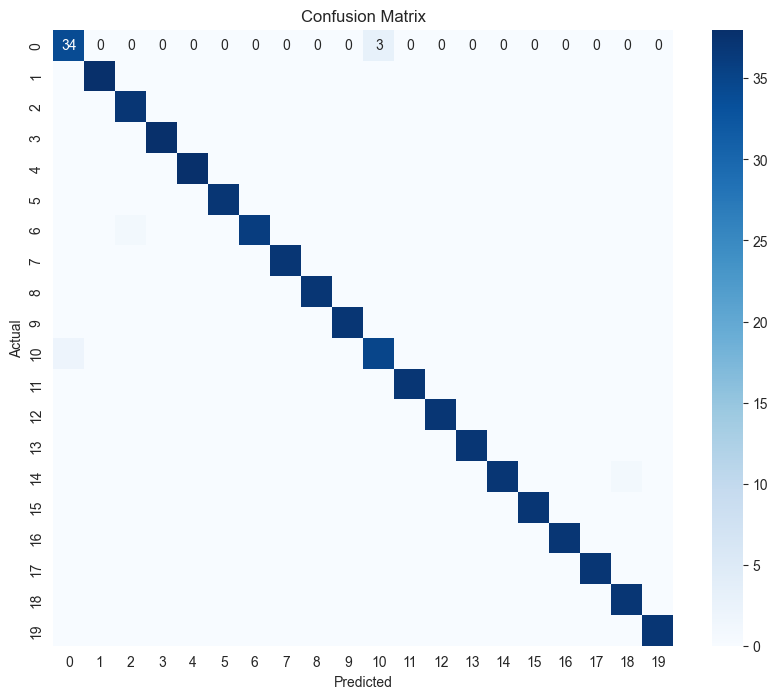

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        37
           1       1.00      1.00      1.00        38
           2       0.97      1.00      0.99        37
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        37
           7       1.00      1.00      1.00        37
           8       1.00      1.00      1.00        37
           9       1.00      1.00      1.00        37
          10       0.92      0.95      0.93        37
          11       1.00      1.00      1.00        37
          12       1.00      1.00      1.00        37
          13       1.00      1.00      1.00        37
          14       1.00      0.97      0.99        38
          15       1.00      1.00      1.00        37
          16       1.00      1.00      1.00        37
          17       1.00    

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score


print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train_one_hot.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test_one_hot.shape)



# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

classification_report(y_test, y_pred)


In [ ]:
# model = KerasClassifier(build_fn = create_model(learning_rate = best_lr, activation = best_act), epochs = best_eps, 
#              batch_size = best_bs)

# # Calculate the accuracy score for each fold
# kfolds = cross_val_score(model, X, y_one_hot, cv = (3))

# Price Prediction

In [ ]:
stock = input("Enter stock name: ")

# Filter entries for the user-specified stock
stock_data = df[df['Stock'] == stock]

# Check if any data was found for the specified stock
if not stock_data.empty:
    print("Data Retrieved")
else:
    print(f"No Data Found For {stock}.")


No Data Found For .


In [ ]:
stock_data.head()

NameError: name 'stock_data' is not defined